# **MOVIE RATING PREDICTION WITH PYTHON**

dataset link : https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies/data

### **Importing Necessary Libraries**

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### **Loading the Dataset**

In [111]:

data = pd.read_csv(r'/content/IMDb Movies India.csv',encoding='ISO-8859-1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


### **Data Cleaning and Preprocessing**

In [112]:
data.shape

(15509, 10)

In [113]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [115]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [116]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [117]:
data.dropna(inplace=True)
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [118]:
data.shape

(5659, 10)

In [119]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [120]:

data['Votes'] = data['Votes'].str.replace(',','').astype('int')


In [121]:
data['Year'] = data['Year'].str.strip('()').astype(int)

In [122]:
data['Duration'] = data['Duration'].str.strip('min')

In [123]:


data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 486.3+ KB


In [124]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### **Visualization**

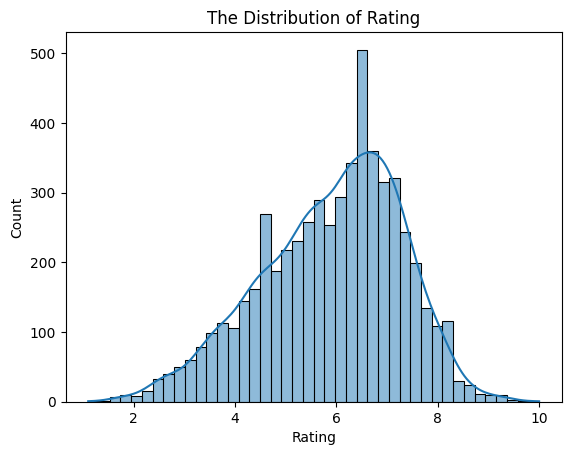

In [126]:
sns.histplot(data = data, x='Rating', kde = True)
plt.title("The Distribution of Rating")
plt.show()

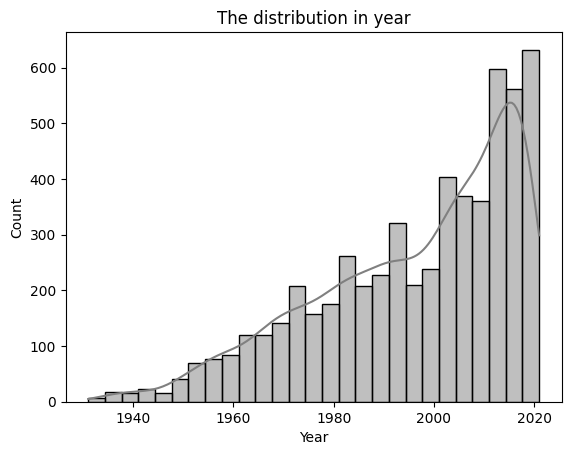

In [127]:
sns.histplot(data=data, x='Year',color='grey', kde=True)
plt.title("The distribution in year")
plt.show()

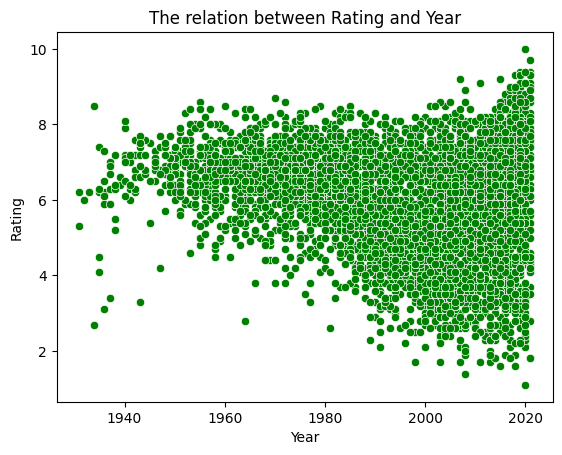

In [128]:
sns.scatterplot(data=data, x='Year', y='Rating', color='green')
plt.title("The relation between Rating and Year")
plt.show()

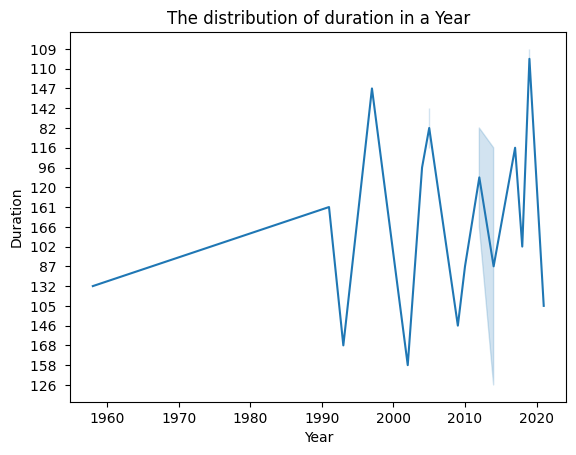

In [129]:
sns.lineplot(data=data.head(20), x='Year', y='Duration')
plt.title("The distribution of duration in a Year")
plt.show()

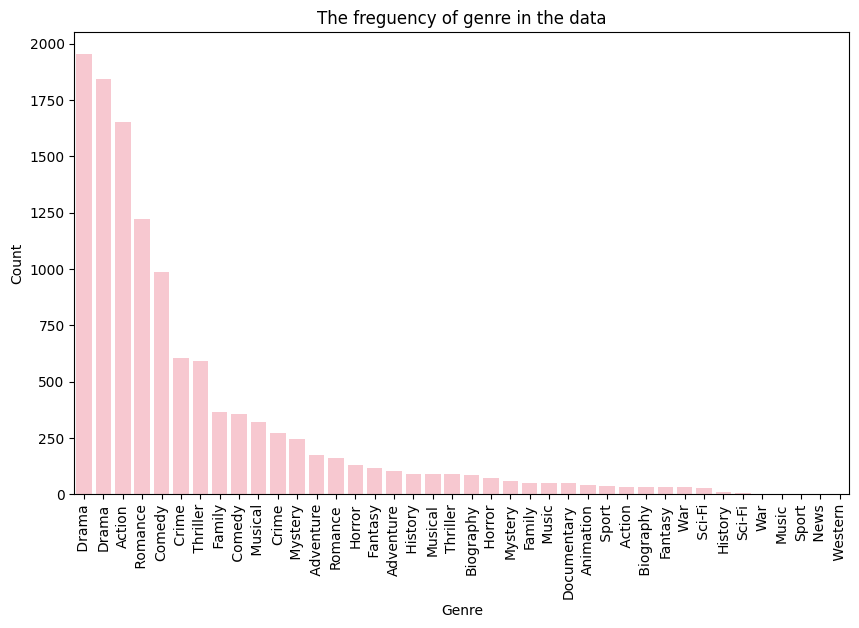

In [130]:
from sklearn.preprocessing import LabelEncoder
movies_genre = data['Genre'].str.split(',',expand=True).stack().value_counts()
labels = movies_genre.keys()
count = movies_genre.values
plt.figure(figsize=(10,6))
sns.barplot(x=labels, y=count, color = ("pink"))
plt.xticks(rotation = 90)
plt.title("The freguency of genre in the data")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


### **Converting categorical to Numerical using Encoding Method**

In [134]:
encoder = LabelEncoder()
data['Actor 1'] = encoder.fit_transform(data['Actor 1'])
data['Actor 2'] = encoder.fit_transform(data['Actor 2'])
data['Actor 3'] = encoder.fit_transform(data['Actor 3'])
data['Director'] = encoder.fit_transform(data['Director'])
data['Genre'] = encoder.fit_transform(data['Genre'])
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013


In [140]:
data1 = data.drop('Name',axis=1)
data1.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,7.0,8,629,1352,2272,319
3,2019,110,184,4.4,35,1335,1198,719,2148
5,1997,147,157,4.7,827,1530,378,75,2045
6,2005,142,289,7.4,1086,2044,692,1112,2524
8,2012,82,320,5.6,326,135,1934,1175,1013


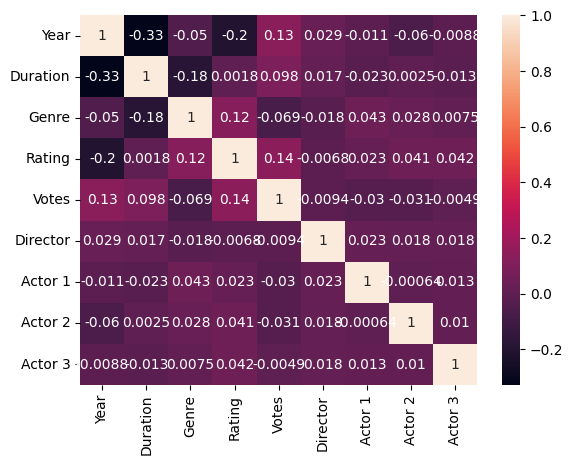

In [141]:
sns.heatmap(data1.corr(), annot=True)
plt.show()

### **Model Selection**

In [144]:
x = data1.drop('Rating', axis=1)
Y = data1['Rating']

In [145]:
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size = 0.3, random_state=42)

In [146]:
model = LinearRegression()
model.fit(x_train,Y_train)

LinearRegression()

In [147]:
pred = model.predict(x_test)
pred

array([5.63683425, 5.84694164, 5.93283536, ..., 6.02786817, 5.89959597,
       5.36480764])

In [152]:
from sklearn.metrics import confusion_matrix , accuracy_score , mean_absolute_error , mean_squared_error ,r2_score
#print("The Confusion Matrix is : ", confusion_matrix(Y_test, pred))
print("The Mean Absolute Error is :", mean_absolute_error(Y_test,pred))
print("The mean Squared Error is : ", mean_squared_error(Y_test,pred))
#print("The Acuuracy Score is :", accuracy_score(Y_test,pred))

The Mean Absolute Error is : 1.0355603579570465
The mean Squared Error is :  1.6737798290839632


In [153]:
#calculating the R2 score
print("The R2 Score is : ", r2_score(Y_test,pred))

The R2 Score is :  0.08633120473998979
